<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/EscolaDigital%26Endless_Doutorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Análise do CONSTRUTO _ "Design Instrucional de Conteúdos “Escola Digital- Online e Endless-Offline”.`**

In [76]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip3 install bokeh

In [0]:
eden = pd.read_csv('/content/drive/My Drive/Pesquisa_Doutorado/Análise_doutorado/Escolas_participantes/Construtos em CSV/Construto_Geral_2ºMódulo.csv')

In [78]:
eden.head()

,Escolas,"Os conteúdos dos materiais didáticos (Objetos Digitais de Aprendizagens – ODAS), disponíveis na (Plataforma Escola Digital) e no (Sistema Operacional Endless) favorecem o meu aprendizado","Os materiais didáticos da disciplina que fazem uso de recursos de multimídia como vídeo-aula, links, áudio, material digital (hipertexto), entre outros recursos, favorecem na minha aprendizagem",A sequência da disposição do conteúdo didático nos materiais da disciplina influencia na minha aprendizagem,Os materiais da aula foram bem combinados com os materiais digitais disponíveis pelas plataformas (Escola Digital e o Endless),O professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens com intuito de favorecer a minha aprendizagem,O uso de estudos de caso em diversas situações reais presentes no conteúdo da disciplina facilita a minha aprendizagem,As minhas participações poderão colaborar com meus colegas em atividades em grupo ao serem avaliadas,As práticas e simulações oriundas dos objetos de aprendizagens – ODAS que estão relacionados às disciplinas estão coerentes com o conteúdo ensinado e favorecem a minha aprendizagem
0,Escola CA,3,4,3,4,4,4,3,3
1,Escola CA,4,4,4,4,3,4,4,4
2,Escola CA,3,1,3,1,2,3,4,3
3,Escola RP,4,4,4,4,4,4,4,4
4,Escola RP,4,4,4,4,4,4,4,4


In [79]:
eden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                             --------------  ----- 
 0   Escolas                                                                                                                                                                                            39 non-null     object
 1   Os conteúdos dos materiais didáticos (Objetos Digitais de Aprendizagens – ODAS), disponíveis na (Plataforma Escola Digital) e no (Sistema Operacional Endless) favorecem o meu aprendizado         39 non-null     int64 
 2   O

In [0]:
eden.rename({'Os conteúdos dos materiais didáticos (Objetos Digitais de Aprendizagens – ODAS), disponíveis na (Plataforma Escola Digital) e no (Sistema Operacional Endless) favorecem o meu aprendizado':'Q001','Os materiais didáticos da disciplina que fazem uso de recursos de multimídia como vídeo-aula, links, áudio, material digital (hipertexto), entre outros recursos, favorecem na minha aprendizagem':'Q002','A sequência da disposição do conteúdo didático nos materiais da disciplina influencia na minha aprendizagem':'Q003','Os materiais da aula foram bem combinados com os materiais digitais disponíveis pelas plataformas (Escola Digital e o Endless)':'Q004','O professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens com intuito de favorecer a minha aprendizagem':'Q005','O uso de estudos de caso em diversas situações reais presentes no conteúdo da disciplina facilita a minha aprendizagem':'Q006','As minhas participações poderão colaborar com meus colegas em atividades em grupo ao serem avaliadas':'Q007','As práticas e simulações oriundas dos objetos de aprendizagens – ODAS que estão relacionados às disciplinas estão coerentes com o conteúdo ensinado e favorecem a minha aprendizagem':'Q008'}, axis='columns', inplace=True)

In [81]:
eden.head()

,Escolas,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
0,Escola CA,3,4,3,4,4,4,3,3
1,Escola CA,4,4,4,4,3,4,4,4
2,Escola CA,3,1,3,1,2,3,4,3
3,Escola RP,4,4,4,4,4,4,4,4
4,Escola RP,4,4,4,4,4,4,4,4


In [0]:
eden = eden.set_index('Escolas')

In [83]:
eden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Escola CA to Escola RF
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    39 non-null     int64
 1   Q002    39 non-null     int64
 2   Q003    39 non-null     int64
 3   Q004    39 non-null     int64
 4   Q005    39 non-null     int64
 5   Q006    39 non-null     int64
 6   Q007    39 non-null     int64
 7   Q008    39 non-null     int64
dtypes: int64(8)
memory usage: 2.7+ KB


In [84]:
eden.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,3,4,3,4,4,4,3,3
Escola CA,4,4,4,4,3,4,4,4
Escola CA,3,1,3,1,2,3,4,3
Escola RP,4,4,4,4,4,4,4,4
Escola RP,4,4,4,4,4,4,4,4


In [85]:
eden.isnull()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False
Escola RP,False,False,False,False,False,False,False,False


In [0]:
eden.dropna(inplace=True)

In [87]:
eden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Escola CA to Escola RF
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    39 non-null     int64
 1   Q002    39 non-null     int64
 2   Q003    39 non-null     int64
 3   Q004    39 non-null     int64
 4   Q005    39 non-null     int64
 5   Q006    39 non-null     int64
 6   Q007    39 non-null     int64
 7   Q008    39 non-null     int64
dtypes: int64(8)
memory usage: 2.7+ KB


In [88]:
eden.columns.values

array(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008'],
      dtype=object)

In [89]:
eden.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
dtype: bool

In [90]:
eden.drop_duplicates()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,3,4,3,4,4,4,3,3
Escola CA,4,4,4,4,3,4,4,4
Escola CA,3,1,3,1,2,3,4,3
Escola RP,4,4,4,4,4,4,4,4
Escola RP,4,4,4,3,4,4,4,3


In [91]:
eden.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
dtype: bool

In [92]:
eden.dtypes

Q001    int64
Q002    int64
Q003    int64
Q004    int64
Q005    int64
Q006    int64
Q007    int64
Q008    int64
dtype: object

In [93]:
# Nesta aplicação foi detectada em Q001 e Q003 uma forte correlação. (1.000000),indicando que os conteúdos dos materiais didáticos (Objetos Digitais de Aprendizagens – ODAS), 
# disponíveis na (Plataforma Escola Digital) e no (Sistema Operacional Endless) favorecem o aprendizado do aluno quando aplicada a 
# sequência da disposição do conteúdo didático nos materiais da disciplina. (Planejamento e Metodologia)
# Da mesma forma na correlação de Q002 e Q006 os materiais didáticos da disciplina que fazem uso de recursos de multimídia como vídeo-aula, 
# links, áudio, material digital (hipertexto), entre outros recursos, favorecem a aprendizagem do aluno, o uso de estudos de caso
# em diversas situações reais presentes no conteúdo da disciplina facilita a sua aprendizagem. (Recursos tecnolóógicos, visuais e simulações)
# Q002,Q004,Q005 e Q006 estão também correlacionados (forte para muito forte) ficando apenas abaixo da correlação (Q002-Q006) acima mencionada.
# As mesmas tratam dos materiais de aula se foram bem combinados com os materiais digitais disponíveis pelas plataformas (Escola Digital e o Endless)                                                                     39 non-null     int64 
# e se o professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens com intuito de favorecer a minha aprendizagem  
eden.corr('pearson')

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Q001,1.000000,0.697741,1.000000,0.587262,0.461821,0.697741,0.697741,0.606274
Q002,0.697741,1.000000,0.697741,0.866342,0.703050,1.000000,-0.026316,0.423022
Q003,1.000000,0.697741,1.000000,0.587262,0.461821,0.697741,0.697741,0.606274
Q004,0.587262,0.866342,0.587262,1.000000,0.573415,0.866342,-0.046829,0.752773
Q005,0.461821,0.703050,0.461821,0.573415,1.000000,0.703050,-0.058587,0.221596
Q006,0.697741,1.000000,0.697741,0.866342,0.703050,1.000000,-0.026316,0.423022
Q007,0.697741,-0.026316,0.697741,-0.046829,-0.058587,-0.026316,1.000000,0.423022
Q008,0.606274,0.423022,0.606274,0.752773,0.221596,0.423022,0.423022,1.000000


In [0]:
# Calcule a correlação  
correlacoes = eden.corr()

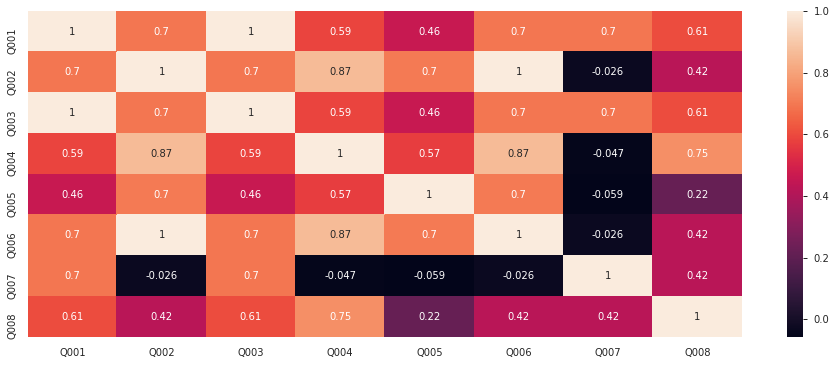

In [95]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [0]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
# eden['Q002'].corr(eden['Q006'])

In [97]:
eden['Q001'].corr(eden['Q003'])

0.9999999999999999

In [0]:
#sns.swarmplot(data=eden, x='Q002', y='Q006')
#plt.axhline(1.0, color='black', linestyle='--')

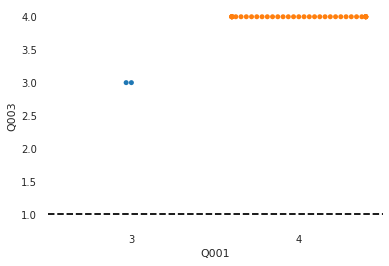

In [99]:
sns.swarmplot(data=eden, x='Q001', y='Q003')
plt.axhline(1.0, color='black', linestyle='--')

In [0]:
#X = eden.drop(['Q002'], axis=1)
#y = eden['Q002']

In [0]:
X = eden.drop(['Q001'], axis=1)
y = eden['Q001']

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[4 3 4 3]
 [4 4 4 4]
 [1 3 3 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [103]:
cols = fit.get_support(indices=True)
eden.iloc[:,cols]

,Q001,Q002,Q005,Q006
Escolas,,,,
Escola CA,3,4,4,4
Escola CA,4,4,3,4
Escola CA,3,1,2,3
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,3,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4


In [0]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [107]:

fit.get_support(indices=True)

array([0, 1, 2, 6])

In [0]:
features = fit.transform(X)

In [109]:
# Visualizando as features:
print(features)

[[4 3 4 3]
 [4 4 4 4]
 [1 3 1 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


In [110]:
cols = fit.get_support(indices=True)
eden.iloc[:, cols]

,Q001,Q002,Q003,Q007
Escolas,,,,
Escola CA,3,4,3,3
Escola CA,4,4,4,4
Escola CA,3,1,3,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [112]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [113]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
eden.iloc[:,cols]

,Q001,Q002,Q006,Q007
Escolas,,,,
Escola CA,3,4,4,3
Escola CA,4,4,4,4
Escola CA,3,1,3,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4
Escola RP,4,4,4,4


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.         0.36159844 0.05409357 0.0006864  0.16520468 0.33557091
 0.082846  ]


In [117]:
# Nome das colunas:
eden

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,3,4,3,4,4,4,3,3
Escola CA,4,4,4,4,3,4,4,4
Escola CA,3,1,3,1,2,3,4,3
Escola RP,4,4,4,4,4,4,4,4
Escola RP,4,4,4,4,4,4,4,4
Escola RP,4,4,4,4,3,4,4,4
Escola RP,4,4,4,4,4,4,4,4
Escola RP,4,4,4,3,4,4,4,3
Escola RP,4,4,4,4,4,4,4,4


In [118]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Q003,0.361598
Q007,0.335571
Q006,0.165205
Q008,0.082846
Q004,0.054094
Q005,0.000686
Q002,0.000000


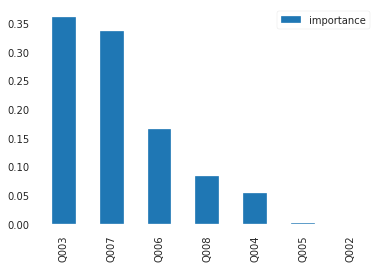

In [119]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [120]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [121]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [122]:
eden.describe()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,3.948718,3.923077,3.948718,3.846154,3.846154,3.974359,3.974359,3.871795
std,0.223456,0.480384,0.223456,0.539906,0.431549,0.160128,0.160128,0.338688
min,3.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [0]:
# Árvore de decisão será o próximo passo de nossa análise, 
# contudo vale apena deixar claro que esta técnica está propência
# a embaralhar os resultados dos testes em relação ao resultado de treinos permitindo o overfitting, e também é um pouco instável.

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(eden.drop('Q001',axis=1),eden['Q001'],test_size=0.3)

In [124]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((27, 7), (12, 7))

In [0]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [0]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [127]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0., 1., 0., 0., 0., 0., 0.])

In [128]:
for feature, importances_ in zip(eden.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importances_))

# Confirmando a melhor correlação (Q002) para (Q006).
# segundo teste - confirmando a melhor correlaçãão (Q001) para (Q003)
# Saída:

Q001:0.0
Q002:1.0
Q003:0.0
Q004:0.0
Q005:0.0
Q006:0.0
Q007:0.0


In [129]:
resultado = clf.predict(X_test)
resultado
# O código acima nos da a seguinte saída:

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [130]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

# Resultado do classification_report:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [131]:
# Renderizando a árvore de forma gráfica:
!pip3 install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot

In [0]:
import pydot
import graphviz

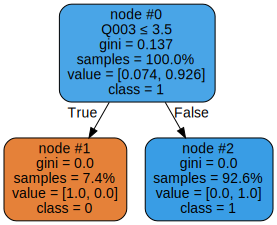

In [133]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=eden.drop('Q001',axis=1).columns,
         class_names=['0','1', '2','3','4'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [134]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = eden.drop('Q001',axis=1),eden['Q001']

# feature labels
features_label = eden.drop('Q001',axis=1).columns

# class label
class_label = ['1', '2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


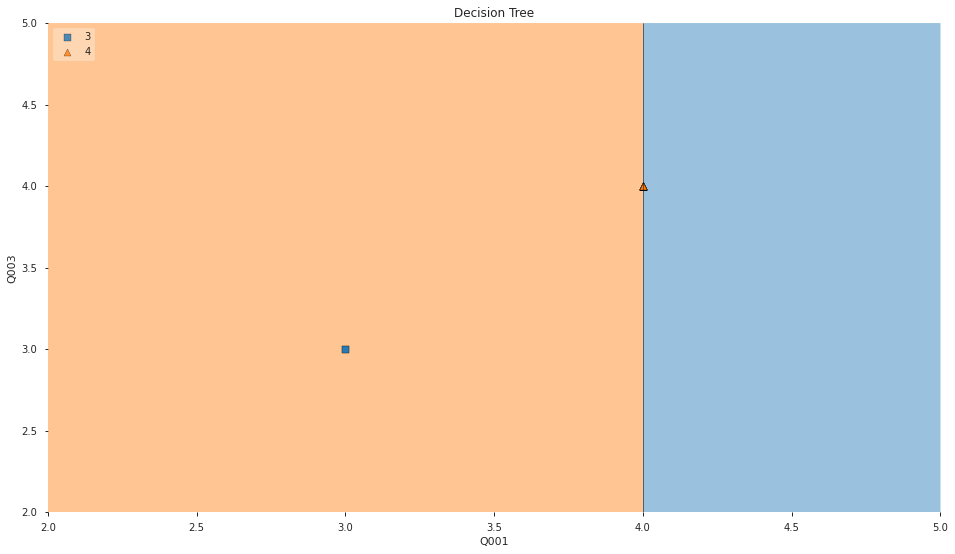

In [135]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = eden[['Q001','Q003']].values
    y = eden.Q003.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Q001')
    plt.ylabel('Q003')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)

In [136]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 3


In [137]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 eden.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 3 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Q002 <= 3.5 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó folha).


In [0]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(eden.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 eden.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [139]:
extrai_regras(2)


Features usadas para predizer a amostra 2
Q001 = 1
Q002 = 3
Q003 = 1
Q004 = 2
Q005 = 3
Q006 = 4
Q007 = 3


id do nó de decisão 0 : (atributo Q002 com valor = 3 <= 3.5)
[3]
	Classe => [3]


In [140]:
extrai_regras(7)


Features usadas para predizer a amostra 7
Q001 = 4
Q002 = 4
Q003 = 3
Q004 = 4
Q005 = 4
Q006 = 4
Q007 = 3


id do nó de decisão 0 : (atributo Q002 com valor = 4 > 3.5)
[4]
	Classe => [4]


In [141]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=ea820420a947d393811bedd86f4137f340458b3581be538a3718c473b5192436
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9x9prms/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(eden, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [144]:
profile

In [145]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [0]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.